# Assignment 1 - Advanced

## Data Analysis

### Adjusting the time column
We first start by preprocessing the data. A lot of changes have to be implemented, as it is currently very unorganized:

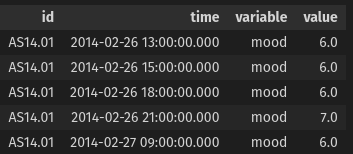

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
dataset = pd.read_csv("dataset_mood_smartphone.csv")
dataset.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


Now let's change the time column to only include the date, and not the specific hour/min at which something was logged:

******I already did this so I commented it out, since it takes a really, really long time**

In [3]:
# This takes a long time, and is done already!!!

# First we remove the timestamps, as we only want the dates for when trying to find unique dates
# temp_dataset = dataset

# for i in range(len(temp_dataset)):
#     temp_dataset["time"][i] = temp_dataset["time"][i][0:10]

# temp_dataset = temp_dataset.sort_values(by=['id', 'time', 'variable']) # Sorting our dataset for good measure
# temp_dataset.to_csv(f"{cwd}/our_datasets/Time_edited_dataset.csv") 

In [4]:
# time_edited_dataset = pd.read_csv(f"{cwd}/our_datasets/Time_edited_dataset.csv")
# time_edited_dataset.head()

In [5]:
time_edited_dataset = pd.read_csv("Time_edited_dataset.csv")


In [6]:
time_edited_dataset.head()

,Unnamed: 0,id,time,variable,value
0,0,AS14.01,2014-02-17,call,1.0
1,1,AS14.01,2014-02-17,call,1.0
2,2,AS14.01,2014-02-18,call,1.0
3,3,AS14.01,2014-02-19,call,1.0
4,4,AS14.01,2014-02-19,call,1.0


As we can see, the date is now correct!

### Setting up our main preproccesing function (For now only outputs generated_dataset, which has all empty mood rows removed)

First, the main function:

In [7]:
def preprocessing(dataset, remove_empty_mood, normalize_time_data, drop_cols, fill_missing_cols_mean):
    data = dataset
    id_list = []
    time_list = []
    mood_list = []
    circumplex_arousal_list = []
    circumplex_valence_list = []
    activity_list = []
    screen_list = []
    call_list = []
    sms_list = []
    appCat_builtin_list = []
    appCat_communication_list = []
    appCat_entertainment_list = []
    appCat_finance_list = []
    appCat_game_list = []
    appCat_office_list = []
    appCat_other_list = []
    appCat_social_list = []
    appCat_travel_list = []
    appCat_unknown_list = []
    appCat_utilities_list = []
    appCat_weather_list = []

    for users in pd.unique(data["id"]):
        
        print(f"Working on user {users}")
        user_data = data.loc[data["id"] == users]
        
        


        for day in pd.unique(user_data["time"]):
            id_list.append(users)
            time_list.append(day)

            try:
                mood_value = user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "mood"]["value"].mean()
                mood_value = round(mood_value)
                mood_list.append(mood_value)
            except:
                mood_list.append(np.nan)
            
            try:
                circumplex_arousal_list.append(round(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "circumplex.arousal"]["value"].mean()))
            except:
                circumplex_arousal_list.append(np.nan)

            try:
                circumplex_valence_list.append(round(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "circumplex.valence"]["value"].mean()))
            except:
                circumplex_valence_list.append(np.nan)

            try:
                activity_list.append(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "activity"]["value"].mean())
            except:
                activity_list.append(np.nan)

            try:
                screen_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "screen"]["value"]))
            except:
                screen_list.append(np.nan)

            try:
                call_list.append(int(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "call"]["value"])))
            except:
                call_list.append(np.nan)

            try:
                sms_list.append(int(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "sms"]["value"])))
            except:
                sms_list.append(np.nan)

            try:
                appCat_builtin_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.builtin"]["value"]))
    

            except:
                appCat_builtin_list.append(np.nan)

            try:
                appCat_communication_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.communication"]["value"]))
            except:
                appCat_communication_list.append(np.nan)

            try:
                appCat_entertainment_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.entertainment"]["value"]))
            except:
                appCat_entertainment_list.append(np.nan)

            try:
                appCat_finance_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.finance"]["value"]))
            except:
                appCat_finance_list.append(np.nan)
            
            try:
                appCat_game_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.game"]["value"]))
            except:
                appCat_game_list.append(np.nan)

            try:
                appCat_office_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.office"]["value"]))
            except:
                appCat_office_list.append(np.nan)

            try:
                appCat_other_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.other"]["value"]))
            except:
                appCat_other_list.append(np.nan)

            try:
                appCat_social_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.social"]["value"]))
            except:
                appCat_social_list.append(np.nan)

            try:
                appCat_travel_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.travel"]["value"]))
            except:
                appCat_travel_list.append(np.nan)

            try:
                appCat_unknown_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.builtin"]["value"]))
            except:
                appCat_unknown_list.append(np.nan)

            try:
                appCat_utilities_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.utilities"]["value"]))
            except:
                appCat_utilities_list.append(np.nan)

            try:
                appCat_weather_list.append(sum(user_data.loc[user_data["time"] == day].loc[user_data["variable"] == "appCat.weather"]["value"]))
            except:
                appCat_weather_list.append(np.nan)

    
            
       
        

    if normalize_time_data == True:
        screen_list = [i / max(screen_list) for i in screen_list]
        appCat_builtin_list = [i / max(appCat_builtin_list) for i in appCat_builtin_list]
        appCat_communication_list = [i / max(appCat_communication_list) for i in appCat_communication_list]
        appCat_entertainment_list = [i / max(appCat_entertainment_list) for i in appCat_entertainment_list]
        appCat_finance_list = [i / max(appCat_finance_list) for i in appCat_finance_list]
        appCat_game_list = [i / max(appCat_game_list) for i in appCat_game_list]
        appCat_office_list = [i / max(appCat_office_list) for i in appCat_office_list]
        appCat_other_list = [i / max(appCat_other_list) for i in appCat_other_list]
        appCat_social_list = [i / max(appCat_social_list) for i in appCat_social_list]
        appCat_travel_list = [i / max(appCat_travel_list) for i in appCat_travel_list]
        appCat_unknown_list = [i / max(appCat_unknown_list) for i in appCat_unknown_list]
        appCat_utilities_list = [i / max(appCat_utilities_list) for i in appCat_utilities_list]
        appCat_weather_list = [i / max(appCat_weather_list) for i in appCat_weather_list]
        



    final_dataframe = pd.DataFrame({"id" : id_list, 
                                    "time": time_list, 
                                    "mood" : mood_list, 
                                    "circumplex.arousal" : circumplex_arousal_list, 
                                    "circumplex.valence" : circumplex_valence_list, 
                                    "activity": activity_list,
                                    "screen" : screen_list,
                                    "call" : call_list,
                                    "sms" : sms_list,
                                    "appCat.builtin" : appCat_builtin_list,
                                    "appCat.communication" : appCat_communication_list,
                                    "appCat.entertainment" : appCat_entertainment_list,
                                    "appCat.finance" : appCat_finance_list,
                                    "appCat.game" : appCat_game_list,
                                    "appCat.office" : appCat_office_list,
                                    "appCat.other" : appCat_other_list,
                                    "appCat.social" : appCat_social_list,
                                    "appCat.travel" : appCat_travel_list,
                                    "appCat.unknown" : appCat_unknown_list,
                                    "appCat.utilities" : appCat_utilities_list,
                                    "appCat.weather" : appCat_weather_list
                                }) 

    if remove_empty_mood == True:
        final_dataframe = final_dataframe.dropna(subset=['mood'])

    for i in range(len(drop_cols)):
        final_dataframe = final_dataframe.drop(drop_cols[i], axis=1) 
    
    print(final_dataframe.columns)
    for i in range(len(fill_missing_cols_mean)):
        final_dataframe = final_dataframe[fill_missing_cols_mean[i]].fillna(final_dataframe[fill_missing_cols_mean[i]].mean(), inplace=True)

    return final_dataframe





Now lets generate a dataset that extracts the varibles without any editing to assess the state of the data:

## Note: fill_missing_cols_mean does not work, was too lazy to edit it, is done manually a bit further down

In [8]:
# the dataset that we want to process
DATASET = time_edited_dataset

# Do you want to remove rows without any mood values
REMOVE_EMPTY_MOOD = True

# Do you want to normalize time data (like screen time) to be between 0-1 (largest screen time would be 1, lowest would be 0)
# Does this for screen time and ALL appCat times
NORMALIZE_TIME = True

# Do you want to remove any columns? For instance: ["activity", "sms"] etc..
DROP_COLS = ["screen", "call", "sms", "appCat.builtin", "appCat.communication", "appCat.finance", "appCat.game", "appCat.other", "appCat.social", "appCat.travel", "appCat.unknown", "appCat.utilities"]

# Do you want to fill any empty entries of any columns with the column mean? For instance: ["activity", "sms"] etc..
FILL_MISSING_COLS_MEAN = []

The we can run the function to generate and store our freshly made dataset:

In [9]:
generated_dataset = preprocessing(dataset = DATASET, remove_empty_mood=REMOVE_EMPTY_MOOD, normalize_time_data=NORMALIZE_TIME, drop_cols=DROP_COLS, fill_missing_cols_mean=FILL_MISSING_COLS_MEAN)


Working on user AS14.01
Working on user AS14.02
Working on user AS14.03
Working on user AS14.05
Working on user AS14.06
Working on user AS14.07
Working on user AS14.08
Working on user AS14.09
Working on user AS14.12
Working on user AS14.13
Working on user AS14.14
Working on user AS14.15
Working on user AS14.16
Working on user AS14.17
Working on user AS14.19
Working on user AS14.20
Working on user AS14.23
Working on user AS14.24
Working on user AS14.25
Working on user AS14.26
Working on user AS14.27
Working on user AS14.28
Working on user AS14.29
Working on user AS14.30
Working on user AS14.31
Working on user AS14.32
Working on user AS14.33
Index(['id', 'time', 'mood', 'circumplex.arousal', 'circumplex.valence',
       'activity', 'appCat.entertainment', 'appCat.office', 'appCat.weather'],
      dtype='object')


0.09216305683113414


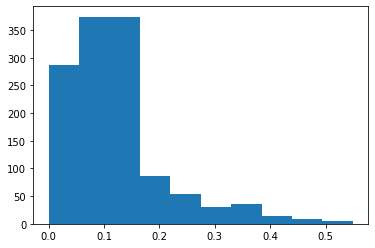

In [44]:

plt.hist(generated_dataset["activity"])
sd = generated_dataset["activity"].std()
mean = generated_dataset["activity"].mean()

activity_list = []
for i in generated_dataset["activity"]:
    activity_list.append(i)


count = 0
for i in activity_list:
    if (mean - sd) <   i < (mean + sd):
        count += 1

print(sd)

In [11]:
generated_dataset.head(20)

,id,time,mood,circumplex.arousal,circumplex.valence,activity,appCat.entertainment,appCat.office,appCat.weather
7,AS14.01,2014-02-26,6.0,0.0,1.0,NaN,0.000000,0.000000,0.00000
8,AS14.01,2014-02-27,6.0,0.0,0.0,NaN,0.000000,0.000000,0.00000
26,AS14.01,2014-03-21,6.0,0.0,0.0,0.134050,0.028033,0.005174,0.00000
27,AS14.01,2014-03-22,6.0,1.0,0.0,0.236880,0.002597,0.000000,0.00000
28,AS14.01,2014-03-23,7.0,0.0,1.0,0.142741,0.002625,0.000000,0.08281
29,AS14.01,2014-03-24,6.0,1.0,0.0,0.078961,0.027185,0.000090,0.00000
30,AS14.01,2014-03-25,7.0,0.0,0.0,0.098374,0.001898,0.000000,0.00000
31,AS14.01,2014-03-26,7.0,0.0,1.0,0.101308,0.025335,0.000000,0.00000
32,AS14.01,2014-03-27,7.0,0.0,1.0,0.159511,0.017790,0.005482,0.00000
33,AS14.01,2014-03-28,6.0,-1.0,1.0,0.095698,0.027976,0.000000,0.00000


Want to save the dataset? Give it a name and it will be stored in the our_datasets folder!

In [12]:
DATASET_NAME = "unedited_for_analysis_mood_final"

generated_dataset.to_csv(f"{cwd}/our_datasets/{DATASET_NAME}.csv")

View your beautiful dataset:

In [13]:
generated_dataset.head(20)

,id,time,mood,circumplex.arousal,circumplex.valence,activity,appCat.entertainment,appCat.office,appCat.weather
7,AS14.01,2014-02-26,6.0,0.0,1.0,NaN,0.000000,0.000000,0.00000
8,AS14.01,2014-02-27,6.0,0.0,0.0,NaN,0.000000,0.000000,0.00000
26,AS14.01,2014-03-21,6.0,0.0,0.0,0.134050,0.028033,0.005174,0.00000
27,AS14.01,2014-03-22,6.0,1.0,0.0,0.236880,0.002597,0.000000,0.00000
28,AS14.01,2014-03-23,7.0,0.0,1.0,0.142741,0.002625,0.000000,0.08281
29,AS14.01,2014-03-24,6.0,1.0,0.0,0.078961,0.027185,0.000090,0.00000
30,AS14.01,2014-03-25,7.0,0.0,0.0,0.098374,0.001898,0.000000,0.00000
31,AS14.01,2014-03-26,7.0,0.0,1.0,0.101308,0.025335,0.000000,0.00000
32,AS14.01,2014-03-27,7.0,0.0,1.0,0.159511,0.017790,0.005482,0.00000
33,AS14.01,2014-03-28,6.0,-1.0,1.0,0.095698,0.027976,0.000000,0.00000


# Data analysis on our dataset

Let's see what kind of data we have now. Important to note is that we removed all rows without any mood values filled in. We could have done an analysis of the raw data, but since we at least know that entries missing a mood value are of no use to us, we can safely remove those first:

## User id's

In [14]:
set(generated_dataset["id"])

{'AS14.01',
 'AS14.02',
 'AS14.03',
 'AS14.05',
 'AS14.06',
 'AS14.07',
 'AS14.08',
 'AS14.09',
 'AS14.12',
 'AS14.13',
 'AS14.14',
 'AS14.15',
 'AS14.16',
 'AS14.17',
 'AS14.19',
 'AS14.20',
 'AS14.23',
 'AS14.24',
 'AS14.25',
 'AS14.26',
 'AS14.27',
 'AS14.28',
 'AS14.29',
 'AS14.30',
 'AS14.31',
 'AS14.32',
 'AS14.33'}

So we seem to be missing 4,10,11,18,21 and 22, which does not mean much but still, good to know

## Dates

[30, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 53, 55, 56, 62, 68] ['2014-02-26', '2014-02-27', '2014-03-04', '2014-03-05', '2014-03-06', '2014-03-07', '2014-03-08', '2014-03-09', '2014-03-10', '2014-03-11', '2014-03-12', '2014-03-13', '2014-03-14', '2014-03-15', '2014-03-16', '2014-03-17', '2014-03-18', '2014-03-19', '2014-03-20', '2014-03-21', '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25', '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29', '2014-03-30', '2014-03-31', '2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04', '2014-04-05', '2014-04-06', '2014-04-07', '2014-04-08', '2014-04-09', '2014-04-10', '2014-04-11', '2014-04-12', '2014-04-13', '2014-04-14', '2014-04-15', '2014-04-16', '2014-04-17', '2014-04-18', '2014-04-19', '2014-04-20', '2014-04-21', '2014-04-22', '2014-04-23', '2014-04-24', '2014-04-25', '2014-04-26', '2014-04-27', '2014-04-28', '2014-04-29', '2014-04-30', '2014-05-01', '2014-05-02', '2014-05-03', '2014-05-04', '2014-05-05', '2014-05-07', '2014-

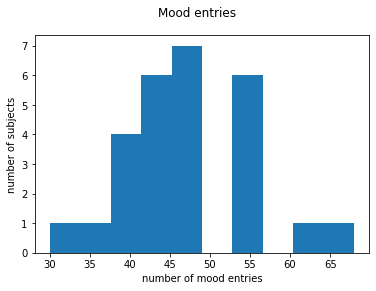

mean entries: 46.96


In [15]:
date_list = []
for users in pd.unique(generated_dataset["id"]):
    user_data = generated_dataset.loc[generated_dataset["id"] == users]
    count = len(user_data["time"])
    date_list.append(count)

print(sorted(set(date_list)), sorted(set(generated_dataset["time"])))
plt.hist(date_list)
plt.suptitle("Mood entries")
plt.ylabel("number of subjects")
plt.xlabel("number of mood entries")
plt.savefig(f"{cwd}/plots/analysis_mood_entries_hist.png")
plt.show()

print(f"mean entries: {round(np.mean(date_list), 2)}")

So it is important to note that the different users have very different lengths of data recordings. One user only provided usable data for a mere 30 days, whereas the most active user provided 68 days of information. Furthermore, our data ranges from **2014-02-26** to **2014-06-08**

## Mood

mean mood: 6.99


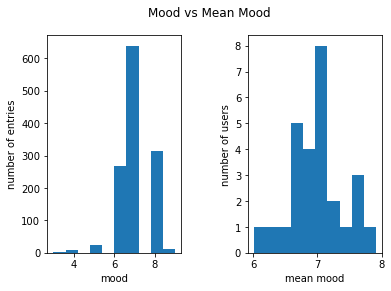

In [16]:
user_mood_list = []
user_mean_mood_list = []
for users in pd.unique(generated_dataset["id"]):
    user_data = generated_dataset.loc[generated_dataset["id"] == users]
    user_mood_list.extend(user_data["mood"])
    user_mean_mood_list.append(np.mean([user_data["mood"]]))




fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.5)
fig.suptitle('Mood vs Mean Mood')
ax1.hist(user_mood_list)
ax1.set_ylabel("number of entries")
ax1.set_xlabel("mood")
ax2.hist(user_mean_mood_list)
ax2.set_ylabel("number of users")
ax2.set_xlabel("mean mood")

plt.savefig(f"{cwd}/plots/analysis_mood_hist.png")

print(f"mean mood: {round(np.mean(user_mood_list), 2)}")

# TAS K 2: LE AR N U S I N G T H E D ATAS E T (40 P O I N TS )

let's first check for missing values

In [17]:
generated_dataset_filled = generated_dataset

for column in generated_dataset.columns:
    print(f"Percentage missing values {column}: {sum(generated_dataset[column].isnull()) / len(generated_dataset)}")

generated_dataset_filled['circumplex.valence'].fillna((generated_dataset_filled['circumplex.valence'].mean()), inplace=True)
generated_dataset_filled['activity'].fillna((generated_dataset_filled['activity'].mean()), inplace=True)

for column in generated_dataset_filled.columns:
    print(f"Percentage missing values {column}: {sum(generated_dataset_filled[column].isnull()) / len(generated_dataset_filled)}")

generated_dataset_filled.to_csv(f"{cwd}/our_datasets/unedited_for_analysis_mood_filled.csv")

Percentage missing values id: 0.0
Percentage missing values time: 0.0
Percentage missing values mood: 0.0
Percentage missing values circumplex.arousal: 0.0
Percentage missing values circumplex.valence: 0.0015772870662460567
Percentage missing values activity: 0.09305993690851735
Percentage missing values appCat.entertainment: 0.0
Percentage missing values appCat.office: 0.0
Percentage missing values appCat.weather: 0.0
Percentage missing values id: 0.0
Percentage missing values time: 0.0
Percentage missing values mood: 0.0
Percentage missing values circumplex.arousal: 0.0
Percentage missing values circumplex.valence: 0.0
Percentage missing values activity: 0.0
Percentage missing values appCat.entertainment: 0.0
Percentage missing values appCat.office: 0.0
Percentage missing values appCat.weather: 0.0


In [18]:
generated_dataset_filled.head()

,id,time,mood,circumplex.arousal,circumplex.valence,activity,appCat.entertainment,appCat.office,appCat.weather
7,AS14.01,2014-02-26,6.0,0.0,1.0,0.119123,0.000000,0.000000,0.00000
8,AS14.01,2014-02-27,6.0,0.0,0.0,0.119123,0.000000,0.000000,0.00000
26,AS14.01,2014-03-21,6.0,0.0,0.0,0.134050,0.028033,0.005174,0.00000
27,AS14.01,2014-03-22,6.0,1.0,0.0,0.236880,0.002597,0.000000,0.00000
28,AS14.01,2014-03-23,7.0,0.0,1.0,0.142741,0.002625,0.000000,0.08281


## Trying out lasso regression:

### Generating baseline:

In [19]:
baseline_accuracy_list = []
baseline_total_accuracy_list = []
j = 0
all_users_mood_list = []
all_users_data = []
for users in pd.unique(generated_dataset["id"]):
    user_data = generated_dataset.loc[generated_dataset["id"] == users]
    user_mood_list = list(user_data["mood"])
    all_users_data.append(user_data)
    all_users_mood_list.append(list(user_data["mood"]))
    user_accuracy = []
    for i in range(len(user_mood_list)):
        if i == 0:
            last_mood = user_mood_list[i]
        else:
            if last_mood == user_mood_list[i]:
                user_accuracy.append(1)
                
                baseline_total_accuracy_list.append(1)
            else:
                user_accuracy.append(0)
                
                baseline_total_accuracy_list.append(0)
    baseline_accuracy_list.append(user_accuracy)

baseline_accuracy = sum(baseline_total_accuracy_list) / len(baseline_total_accuracy_list)
print("Baseline accuracy:", baseline_accuracy)




Baseline accuracy: 0.3448831587429492


Creating a list of baseline accuracies per user per day (going up):

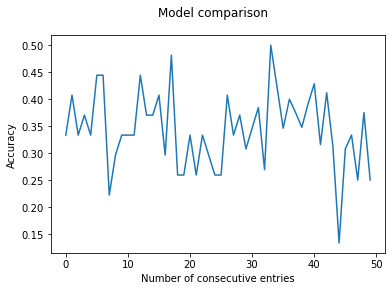

In [20]:
temp_list = []
day_list = [[] for _ in range(67)]
for user in range(len(baseline_accuracy_list)):
    temp_list = []
    temp_list_thing = []
    for day in range(len(baseline_accuracy_list[user])):
        tempie = baseline_accuracy_list[user][day]
        day_list[day].append(tempie)



baseline_accuracies = []
for i in range(len(day_list)):
    acc = sum(day_list[i]) / len(day_list[i])
    baseline_accuracies.append(acc)

plt.plot(baseline_accuracies[0:50])
plt.suptitle("Model comparison")
plt.xlabel("Number of consecutive entries")
plt.ylabel("Accuracy")
plt.xticks(range(0, 51, 10))
plt.savefig(f"{cwd}/plots/baseline.png")


This result is to be expected! The baseline hovers around the 34% mark as we calculated arealier, and given that there are fewer entries when the number of days progresses, we should expect to see more extreme values, where either many are right or almost none are correctly predicted based on purely taking the last day's mood as the prediction!

Now on to a lasso regression method, first we simply take all the data without the temporal aspect, and try to predict a test set based on 20% of our entire unordered dataset. Since it does not differentiate between days or even user, it is not expected that it will fare any better than the baseline:

In [21]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
clf = linear_model.Lasso(alpha=0.01)

# temp_df = generated_dataset_filled.drop(["id", "time", "mood"], axis=1)
temp_df = generated_dataset_filled.drop(["id", "time", "mood"], axis=1)
x = temp_df.values.tolist()
y = list(generated_dataset_filled["mood"])

combined_accuracy = []
for i in range(51):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    clf.fit(X_train, y_train)
    combined_accuracy.append(clf.score(X_test, y_test))

print("Average accuracy with lasso regression:", round(np.mean(combined_accuracy), 2))
print(len(combined_accuracy))


Average accuracy with lasso regression: 0.32
51


Now lets do lasso regression per user:

In [81]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
clf = linear_model.Lasso(alpha=0.01)

scores = []
day_list = [[] for _ in range(68)]
for user in pd.unique(generated_dataset_filled["id"]):
    user_data = generated_dataset_filled.loc[generated_dataset_filled["id"] == user]
    user_y_data = user_data["mood"]
    user_data = user_data.drop(["id", "time", "mood"], axis=1)
 

    X_train, X_test, y_train, y_test = train_test_split(user_data, user_y_data, test_size=0.2)
    clf.fit(X_train, y_train)

    dataset_x = []
    for i in range(len(X_test)):
        dataset_x.append(X_test.iloc[i])
    dataset_y = []
    for i in range(len(y_test)):
        dataset_y.append(y_test.iloc[i])

    count = 0
    for i in range(len(dataset_x)):
        # a = np.array(dataset_x[i])
        # a = a.reshape(1,-1)
        # print(a)
        prediction = clf.predict(np.array(dataset_x[i]).reshape(1, -1))
        prediction = round(prediction[0])
        if prediction == dataset_y[i]:
            count += 1
    score = count / len(dataset_x)



    scores.append(score)

np.mean(scores)

/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/

0.6211267127933795

In [72]:
type(X_test)

pandas.core.frame.DataFrame

Now on to the temporal model:

In [22]:
# all_users_data, all_users_mood_list

day_list = [[] for _ in range(68)]
for user in pd.unique(generated_dataset_filled["id"]):
    user_data = generated_dataset_filled.loc[generated_dataset_filled["id"] == user]
    user_y_data = user_data["mood"]
    user_data = user_data.drop(["id", "time", "mood"], axis=1)
    dataset_x = []
    dataset_y = []
    for day in range(len(user_data)):
        if day < 2:
            day_list[day].append(0)
            dataset_x.append(list(user_data.iloc[day]))
            dataset_y.append(user_y_data.iloc[day])
        else:
            clf.fit(dataset_x, dataset_y)
            predicted_x = clf.predict(np.array(list(user_data.iloc[day])).reshape(1, -1))
            if np.around(predicted_x) == user_y_data.iloc[day]:
                day_list[day].append(1)
            else:
                day_list[day].append(0)
            dataset_x.append(list(user_data.iloc[day]))
            dataset_y.append(user_y_data.iloc[day])

            





/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

Lasso regression over time accuracy: 0.5604320775394638


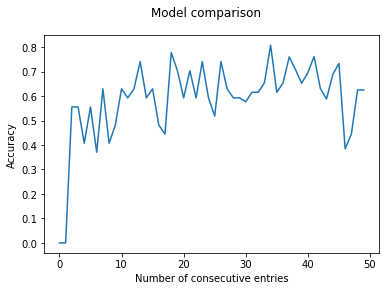

In [23]:
accuracy_linear_time = []
for day in range(len(day_list)):
    day_mean = np.mean(day_list[day])
    accuracy_linear_time.append(day_mean)




print("Lasso regression over time accuracy:", np.mean(accuracy_linear_time))

plt.plot(accuracy_linear_time[0:50])
plt.suptitle("Model comparison")
plt.xlabel("Number of consecutive entries")
plt.ylabel("Accuracy")
plt.xticks(range(0, 51, 10))
plt.savefig(f"{cwd}/plots/lasso_with_time.png")

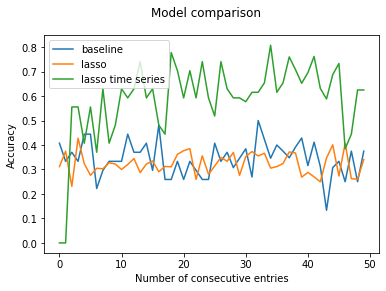

In [24]:
baseline = []
for i in range(51):
    baseline.append(0.35)




plt.plot(baseline_accuracies[1:51], label="baseline")
plt.plot(combined_accuracy[0:50], label="lasso")
plt.plot(accuracy_linear_time[0:50], label="lasso time series")
plt.legend(loc="upper left")
plt.suptitle("Model comparison")
plt.xlabel("Number of consecutive entries")
plt.ylabel("Accuracy")
plt.xticks(range(0, 51, 10))
plt.savefig(f"{cwd}/plots/model_comparison.png")

In [25]:
df = pd.DataFrame({"baseline" : baseline_accuracies[0:51], "lasso":combined_accuracy[0:51], "lasso_time": accuracy_linear_time[0:51]})

df.to_csv(f"{cwd}/our_datasets/r_multiple_test.csv")

So this is our accuracy, it went up quite a bit when taking into account the temporality of the data

## ARIMA network <- (0, 1, 2) <-(extra, unable to finish)

In [21]:
from statsmodels.tsa.arima.model import ARIMA

arima_predictions_list = [[] for _ in range(68)]
for user in pd.unique(generated_dataset["id"]):
    user_data = generated_dataset.loc[generated_dataset["id"] == user]
    user_y_data = user_data["mood"]
    user_data = user_data.drop(["id", "time", "mood", "call", "sms", "appCat.builtin", "appCat.entertainment", "appCat.finance", "appCat.game", \
    "appCat.office", "appCat.other", "appCat.social", "appCat.travel", "appCat.unknown", "appCat.utilities", "appCat.weather"], axis=1)

    dataset_x = [[] for _ in range(len(user_data))]
    for i in range(len(user_data)):
        dataset_x[i].extend(user_data.iloc[i])

    predictions = []
    dataset_y = list(user_y_data)
    for t in range(len(dataset_x)):
        model = ARIMA(dataset_x[t], order=(1,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
  

/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/damion/anaconda3/envs/DMT/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximu